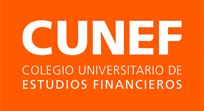

# Máster en Data Science - Machine Learning

# <div style="text-align: center"><font size=25><b>Generalized Additive Models (GAM)</b></font></div>
##### <div style="text-align: center"><font color='dodgerblue' face='Montserrat'>Autor: Rodrigo Fernandez Campos</font></div>

# Introducción

El mundo del machine learning actualmente se encuentra en un boom de crecimiento debido a las nuevas tecnologías que permiten ejecutar modelos de una complejidad matemática y sobre todo computacional que hace un tiempo no era posible, pero los algorítmos detrás de estos modelos existen desde hace ya mucho tiempo y siempre se encuentran en estado de avance. En este caso, vamos a hablar un tipo de modelo que surge de la misma manera natural que la gran mayoría de los existentes actualmente: como una mejora de un modelo precursor, con el fin de generalizar sus resultados y mejorar su ajuste a diferentes sets de datos.

Así es como surgieron los Modelos Aditivos Generalizados, más conocidos como GAM por sus siglas en inglés (Generalized Additive Models), los cuales buscan ampliar, flexibilizar, generalizar la aplicación de sus modelos precursores: la regresión lineal principalmente, y derivados como los Modelos Lineales Generalizados (GLM). La idea de este análisis es básicamente el poder explicar de manera clara todo lo que envuelve a los GAM y su aplicación en proyectos de Machine Learning. Para ello se buscará explicar su contexto y marco teórico, como también los casos más generales de aplicación, ventajas y desventajas, además de algún ejemplo práctico de utilización dichos algorítmos.

La orientación del análisis y de la presentación de conocimientos será, como se ha solicitado desde la cátedra, una ejemplificación de un tema como si se tuviese que dar una clase abierta sobre el mismo, explicando cada parte de estos modelos y su aplicación de manera que sea lo más fácilmente entendible dentro de la complejidad que ofrecen modelos de este estilo. En cuanto a complejidad me refiero a las matemáticas principalmente, por lo que intentaré dar un enfoque en el que se puedan "bajar a tierra" conceptos complejos sobre el funcionamiento interno del modelo, sin entrar en demasiados tecnicísmos, pero manteniendo la rigurosidad matemática.

Una vez explicados los objetivos básicos del proyecto, procedemos a exponer el contenido.


# ¿Qué son los GAM?: Origen y contexto

Antes de comenzar a comentar que son los modelos GAM, es menester mencionar el porqué son ciertamente interesantes dentro del espectro de modelos actualmente, ya que con esto también obtendremos contexto tanto sobre su origen como sobre la "familia" de modelos a la que se los puede asociar. En este sentido, los GAM surgen, al igual que otras alternativas como los GLM, como respuesta a uno de los problemas de los modelos básicos de regresión lineal, en este caso específicamente para buscar ajustar el modelo a la posibilidad de que existan relaciones no lineales entre nuestra Y (función que buscamos para predecir nuestra variable objetivo) y las variables del dataset. El modelo inicialmente desarrollado por Trevor Hastie y Robert Tibshirani en 1986 y básicamente lo que busca es adaptar modelos lineales a la posibilidad de existencia de relaciones no necesariamente lineales.

<div align="center">
  <img src="../images/Trevor_Hastie_y_Robert_Tibshirani.webp">
</div>
<div style="text-align: center"><font size=2 color='grey'>Fuente de la imagen: <a src="https://www.r-bloggers.com/2015/01/2014-highlight-statistical-learning-course-by-hastie-tibshirani/">R-bloggers</a></font></div>
<br>

En este sentido, se puede decir que los GAM se mantienen dentro de la "familia" de los modelos de regresión, por lo que en principio pensaríamos que esto es excelente, debido a la gran ventaja que poseen este tipo de modelos en cuanto a la **interpretabilidad** que nos brindan, algo cada vez más valorado dentro del mundo de la ciencia de datos. Más adelante se desarrollará con mayor profundidad este tema, pero he de adelantar que, al igual que todos los métodos que hacen al análisis más sofisticado y por ende más potente, los GAM, que por un lado nos brindarán importantes mejoras, también harán que la interpretabilidad se vea un poco mermada debido a este proceso de sofisticación del algorítmo utilizado.

También se comenta que, como se verá cuando se profundice en la composición del modelo, los GAM representan un avance en cuanto a la generalización y potencia de modelos lineales, al punto de ser una especie de precursores de lo que más adelante serían modelos más complejos como los PPR (projection pursuit regression, un avance sobre modelos aditivos) o las Neural Networks, lo cual los hace aún más interesantes. Este avance se genera, al igual que en otros métodos no tan sofisticados pero similares, añadiendo especies de transformaciones a las variables del análisis, lo que modifica su comportamiento originariamente lineal en la fórmular de una regresión lineal simple.

Las transformaciones a variables para su posterior procesamiento usualmente son utilizadas con fines similares, siendo bastante común ver transformaciones de tipo logarítmica, cuadrática, cúbica o hasta de grados superiores. También suelen utilizarse categorizaciones en las variables con el fin de medir de manera "escalonada" ciertos comportamientos, aunque esto último no suele verse mucho ya que no es muy preciso ni fácil de aplicar de manera adecuada. En la misma línea pero aumentando varios escalones en cuanto a complejidad, aparecen los GAM, quienes realizan transformaciones a las variables de manera similar, pero en este caso mediante el uso de *funciones flexibles*, generalmente llamadas **splines**, de las cuales deberemos hablar con mayor profundidad más adelante. Este tipo de transformaciones permiten no solo ajustar problemas de regresión a relaciones no lineales, sino que además ajustan de manera más "personalizada" cada función, ya que el *suavizado* puede tener muchos *nodos*, aunque, al igual que en todo modelo que tiende a una mayor sofisticación en su cálculo, por supuesto también se debe tener cuidado con incurrir en el overfitting.

Todos estos conceptos mencionados y resaltados serán comentados en profundidad en el siguiente apartado, ya que ahora mismo buscamos explicar simplemente el origen y contexto de los modelos aditivos generalizados. En este sentido, no podemos dejar de mencionar que existen muchas variaciones de estos y a su vez también modelos matemáticos similares pero con distintos objetivos. Por ejemplo los GLM, que serían prácticamente precursores de los GAM, que buscan mejorar a la regresión lineal permitiendo el uso de cualquier tipo de distribución de la familia de las exponenciales, como lo podrían ser distribuciones de poisson, binomial, entre otras, además de añadir el uso de funciones de enlace en su fórmula. Por otro lado, tenemos modelos posteriores a los GAM como pueden ser los GAMLSS, algorítmos aún más flexibles que modelan más parámetros de la distribución de cada variable, o los GAM Mixtos (GAMMS), que complejizan aún más el análisis (y por ende la interpretabilidad), añadiendo efectos aleatorios como randoms intercepts, smooths y demás. Estos son modelos muy interesantes, pero cuyo análisis profundo no está incluído dentro de los contenidos de este informe, a pesar de que serán comentados brevemente.

En definitiva, lo que buscaremos mediante la aplicación de los GAM será básicamente llegar a obtener relaciones que una simple regresión lineal no logra determinar de la mejor manera, mediante el uso de transformaciones sofisticadas en las variables del modelo, con el fin de mejorar el ajuste y las predicciones a diferentes sets de datos. Además gracias a que nos mantenemos dentro de la familia de las regresiones, además de haber mejorado el modelado, seguiremos manteniendo cierto nivel de interpretabilidad bastante aceptable, lo que hace especialmente atractivos a estos modelos hoy en día en determinados ámbitos de negocio y estadística.

# Marco teórico y matemático de los GAM

Una vez definidos conceptualmente, es inevitable el tener que explicar ciertos fundamentos matemáticos que definen al modelo y que lo dotan de características especiales buscadas para predecir relaciones no estríctamente lineales. Para esto, vamos a comenzar comentando el funcionamiento y fórmula de su predecesor, el modelo de regresión lineal, cuya fórmula se muestra a continuación: $$ y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_px_p $$
En ella se puede observar a simple vista como la variable objetivo (y) se explica en base a una sumatoria de una constantes que multiplican a cada variable, otorgándole un peso específico, más una constante independiente que define la intersección de la recta. Por supuesto esto da origen a relaciones lineales, como las que se podrán observar en el cuadrante superior izquierdo del gráfico ejemplificativo. Además, aquí se muestran gráficamente las diferencias notorias que existen entre una regresión lineal, una con transformación logarítmica, una con categorización de datos y por último una realizada mediante el uso de GAM.

<div align="center">
  <img src="../images/models_plots.webp">
</div>
<div style="text-align: center"><font size=2 color='grey'>Fuente: <a src="https://towardsdatascience.com/generalised-additive-models-6dfbedf1350a">Towards Data Science - Generalized Additive Models</a></font></div>
<br>

Entre medio de los GAM y la regresión lineal simple aparecen los Generalized Linear Models (GLM), modelos que, como se mencionó con anterioridad, buscan generalizar la regresión lineal a más tipos de distribuciones, en este caso exponenciales. Con ellos se define una fórmula que parece ser un intermedio entre la regresión lineal base y los GAM: $$ g(\mu) = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_px_p $$
Donde $ \mu = E(Y) $ e $Y$ pertenece a una distribución de la familia exponencial, además siendo $g$ una función de enlace. Como vemos, aquí se agregan las distribuciones exponenciales a la ecuación mediante una función de enlace que se determina según la distribución utilizada, como lo serían por ejemplo la distribución Poisson y el logarítmo natural como función de enlace.

Finalmente, como avance a las dos fórmulas anteriores se desprende la fórmula de los GAM, la cual añade funciones como medidas de transformación de las variables, quedando conformada de la siguiente manera: $$ g(\mu) = \beta_0 + f_1(x_1) + f_2(x_2) + ... + f_p(x_p) $$
Donde nuevamente $ \mu = E(Y) $, $Y$ pertenece a una distribución de la familia exponencial y se utiliza una función de enlace según la distribución al igual que en GLM. Como podemos ver, en el caso de los GAM cada variable es transformada por una función arbitraria. Esta función puede ser de cualquier tipo en realidad, aunque por lo general se utilizan smooth splines, es decir, funciones de suavizado, por lo general no especificadas al ajustar el modelo por el usuario, sino que el mismo algorítmo la define en su entrenamiento, lo cual dota al modelo de una gran flexibilidad para ajustarse a relaciones no lineales desconocidas entre las variables y el target, aún más que las transformaciones antes vistas. Hemos de recalcar que, la expresión de los parámetros es lineal debido a la fórmula aditiva, pero eso no implica que la función ajustada resultante sea lineal, al contrario, en este caso por lo general es no lineal debido a las transformaciones suaves.

En un momento profundizaremos sobre las splines, pero para ello antes se deberán detalar algunos conceptos importantes en general de estos modelos. En primer lugar, recordar que la base conceptual de los GAM vendría a ser que cada función $y=f(x)$ puede explicarse como la suma de varias funciones más simples. De esta manera la función resultante en principio podría adaptarse a patrones más complejos en base a cada una de las partes (funciones) que la componen. Estas funciones pueden ser lineales, polinómicas, o de cualquier estilo, pero como comentamos, en el caso de estos modelos se suelen utilizar splines suavizados. Como en todas las funciones de este estilo, sobre todo las que complejizan los modelos aumentando sus grados, hay que tener cuidado debido a que se debe intentar estar balanceados entre el ajuste de la tendencia global del modelo y las variaciones locales. Si tendemos mucho a lo segundo, corremos alto riesgo de producir overfitting y por ende empeorar la capacidad predictiva general de nuestro modelo.

Teniendo esto en cuenta, y que por lo general los GAM tienen como objetivo ajustar la función resultante a la tendencia global de los datos buscando predecir de la mejor manera posible pero sin ajustar el "ruido" en los mismos (llamado variación local aleatoria), volvemos a pensar que funciones muy complejas en estos splines podrían conducir al overfitting del modelo. Veamos este ejemplo:
<div align="center">
  <img src="../images/ajustes_polinomios.png">
</div>
<div style="text-align: center"><font size=2 color='grey'>Fuente: Modelo Aditivo Generalizado - Pablo Inchausti Estadística <a src="https://www.youtube.com/watch?v=5XSZFt0oQng&ab_channel=PabloInchaustiEstadistica"></a></font></div>
<br>

Vemos como a medida que aumenta el grado del polinomio, como es de público conocimiento, la función podrá tomar patrones más complejos y curvas más pronunciadas. Por lo general buscaremos mejorar lo que hace un ajuste de grado 1, pero también buscaremos evitar sobreajustes que no generalizan como vemos que sucede con el grado 9. En el caso de los splines se ha podido demostrar que, por lo general, un tipo de splines específico, que son los cúbicos suavizados, cuyo nombre ya nos da a entender que utilizan polinomios de, como máximo, tercer grado y que tienen ciertas particularidades importantes para el modelo, como lo son la utilización de "nodos" y de un criterio específico de penalización que analizaremos a la brevedad. Estos polinomios suelen ser cúbicos debido a que aportan una flexibilidad bastante razonable sin tener una gran complejidad, estándo demostrado que suelen optimizar muy bien este tipo de funciones.

La base de estos Smoothed Cubic Splines es que dividen los datos de las relaciones entre cada variable explicativa y el target en secciones que están definidas por "nodos", que vendrían a representar los grados de libertad de la función. En cada una de estas secciones se ajustará una función cúbica con distintos comportamientos, los que mejor se ajusten al segmento en análisis, combinando estos polinomios cúbicos locales mediante una función de suavizado. Para una mejor interpretación, se adjunta a continuación un gráfico en donde se puede ver como una función se segmenta en base a una serie de nodos, y para cada segmento se puede apreciar una función suavizada diferente.

<div align="center">
  <img src="../images/nodos_splines.png">
</div>
<div style="text-align: center"><font size=2 color='grey'>Fuente: Modelo Aditivo Generalizado - Pablo Inchausti Estadística <a src="https://www.youtube.com/watch?v=5XSZFt0oQng&ab_channel=PabloInchaustiEstadistica"></a></font></div>
<br>

Como es evidente, debemos destacar que dos parámetros claves para determinar el grado de ajuste de la curva final entonces van a ser la cantidad de nodos utilizados por un lado, mientras que por otro vamos a tener al parámetro Lambda, un penalizador que ayuda al modelo a lidiar muy bien con el sobreajuste, de una manera similar a como se realiza en otras regresiones como Lasso o especialmente Ridge, a continuación veremos el porqué. No existen criterios teóricos generales para definir estos parámetros, pero por supuesto estos algóritmos tienen criterios de optimización que buscan reducir el sobreajuste en base a la utilización de estos basados en GCV (Generalized Cross Validation), el cual en una serie de iteraciones va optimizando el modelo hasta encontrar la mejor combinación de número de nodos y lambda. Tanto el lambda como los nodos se estiman y optimizan numéricamente como parte del ajuste del GAM, además de poder realizarse pruebas como Grid o Random Search con el fin de buscar por ejemplo el mejor lambda.

Es de relativamente alta importancia el lograr comprender el uso de la cantidad de nodos y el lambda, no solo desde el punto de vista matemático, sino para el uso del modelo como científico de datos. Lo que se debe entender en principalmente que estos son parámetros claves en el modelo para determinar el nivel de ajuste (y posible sobreajuste) del mismo a los datos. Imaginemos cantidades muy grandes de nodos, es más, en el extremo en el que haya un nodo por instancia, eso significa que la función se ajustará de manera tan perfecta que pasará por cada uno de los datos. Este sería el máximo sobreajuste posible y sería pésimo. Aún así, sin llegar a ese extremo, una cantidad alta de nodos implica un menor poder de generalización de la función, mientras que cantidades muy pequeñas pueden limitar mucho a la misma, por ello lo ideal es que la función consiga el óptimo en este sentido.

Lo mismo pasa con el Lambda en el sentido de que es una función que requiere de la penalización para ser optimizada de manera correcta, y específicamente en el caso de este modelo ésta funciona de gran manera, debido a que es posible buscar la función que tenga un mayor "suavizado" de una manera muy ocurrente. La idea es lograr minimizar la siguiente función de pérdida: $$ \sum_{i = 1}^{N}(y_i - \alpha - \sum_{j = 1}^{p}f_j(x_{ij}))^2 + \sum_{j = 1}^p \lambda_j \int f''_j(x_j)^2 dx_j $$

Como se puede notar el primer gran término es igual al de una función de regresión con regularización como lo puede ser la regresión **Ridge**, hasta el término del lambda se mantiene similar, pero en este caso lo que ajusta este lambda es el sumatorio de la <u>derivada segunda</u> de la función spline que transforma la variable en el modelo. Esto suena a difícil pero es bastante intuitivo en realidad. Si nosotros buscamos disminuír el sobreajuste, nos interesa que la función sea lo más suave posible, es decir que intentaríamos que la función no tenga fluctuaciones tan abruptas, condición que puede medirse con la segunda derivada de la misma ya que mide la tasa de cambio de la primera derivada. Para mostrarlo mejor utilizaré el siguiente gráfico:
<div align="center">
  <img src="../images/regresion_overfit.png">
</div>
<div style="text-align: center"><font size=2 color='grey'>Fuente: <a src="https://es.mathworks.com/discovery/overfitting.html">MathWorks</a></font></div>
<br>

Como se puede observar, en casos de overfitting la función tiende a tener movimientos muy abruptos, lo opuesto a algo suave. Esto quiere decir que la sumatoria de los cuadrados de la segunda derivada será especialmente alto en estos casos, por lo que lo que buscaremos será minimizar dicho comportamiento. De esta manera y sumado al uso del parámetro Lambda podemos penalizar este tipo de comportamientos, logrando que la función tienda a la gráfica central más que a la primera en donde claramente se nota un overfitting.

Habiendo explicado todo lo referente al funcionamiento de las funciones del modelo, solo quedaría mencionar un apartado no menos importante que es el de la explicabilidad. Es evidente que una función con más funciones dentro, cada una con transformaciones diferentes es más complejo de interpretar que una regresión lineal simple, por lo que, al igual que cualquier modelo que aumenta su complejidad, el GAM también pierde cierta interpretabilidad. Aún así, sigue siendo un modelo que brinda mucha información en este sentido, y que, mantiene el hecho de que, si dejamos todas las variables y a la constante fijas excepto una, vamos a poder determinar de que manera cambios en esa variable aislada genera cambios en la variable objetivo, aunque en este caso vamos a tener de por medio a la función suave y puede que una función de enlace dependiendo el caso, lo cual agrega dificultad, pero al menos mantiene esa interpretabilidad prácticamente directa, lo cual es de valorar en el estado actual de la ciencia de datos.


# Aplicaciones generales de los modelos GAM

Al tratarse de un derivado de las regresiones lineales, además con el agregado de poder deducir relaciones no lineales, generalizando así aún más su uso y sin perder por completo una ventaja como es la interpretabilidad, los modelos GAM pueden resultar muy versátiles y por ende tener muchas aplicaciones en cualquier tipo de problemas en los que se aplica la ciencia de datos hoy en día. Cualquier problema de regresión en el que se intuyan relaciones no lineales de las variables con el target podrá ser ajustado por este modelo, teniendo en cuenta ventajas y desventajas, limitaciones y consideraciones especiales mencionadas anteriormente por supuesto. Estos pueden abarcar desde el ámbito de las finanzas en scoring de riesgo crediticio, en medio ambiente y ecología, frecuentemente utilizados para relacionar variables ambientales con existencia o no de ciertas especies en determinados ecosistemas, en análisis de comportamiento de consumidores en ámbitos de comercialización, entre muchas más aplicaciones específicas.

Además, últimamente estos modelos están cobrando especial relevancia en lo que refiere a modelos de Series Temporales debido a que brinda ciertas ventajas a la hora de realizar ciertos análisis. Por ejemplo, debido a su flexibilidad, ya que las series temporales a menudo presentan patrones no lineales y estacionales que los GAM pueden modelar eficazmente. También son buenas manejando patrones de estacionalidad y heterocedasticidad (variabilidad no constante a lo largo del tiempo), algo usual en series temporale. Además, si además se usan los GAMM (Modelos Aditivos Generalizados Mixtos), es posible modelar autocorrelaciones en los datos, lo que permitiría ir más allá en cuanto a la potencia de las predicciones. A todo esto además se le debe sumar siempre el potencial de interpretabilidad que poseen los modelos.

Además de temas conceptuales, me interesa también hacer mención a los diferentes software que nos permiten aplicar este tipo de algorítmos actualmente. He de decir que la gran mayoría de los desarrollos de los GAM y de las variaciones de las regresiones lineales en general actualmente están en **R**, lo cual es lógico debido a la fuerte orientación estadística-matemática del lenguaje, sobre todo en ámbitos académicos. De igual manera, existen librerías en otros lenguajes como Python que permiten aplicar modelos de este tipo. Algunas de las librerías principales para la aplicación de dichos algorítmos son 'gam' o 'mgcv' en R y 'statmodels' o sobre todo 'PyGAM' en **Python**. Además, existe una librería muy en boga actualmente específica para series temporales llamada **Prophet**, desarrollada por Facebook (Meta) y disponible tanto en R como en Python, la cual se basa justamente en modelos aditivos generalizados para realizar sus predicciones, logrando muy buenos resultados.

Antes de pasar a los ejemplos prácticos, es interesante comentar en formato de bullets algunas de las ventajas y desventajas sobre el uso de los modelos aditivos generalizados, aunque he de comentar que por supuesto estas son relativas tanto al problema en cuestión como al modelo contra los que se las compare, brindando siempre aspectos positivos y negativos en relación al caso de estudio. Si existiese el modelo perfecto sólo se usaría ese, pero no es caso del panorama actual y no sería tan divertido, por lo que parece interesante conocer en que situaciones es conveniente aplicar modelos como los GAM y que pueden aportar a nuestros análisis.

En cuanto a las **ventajas** que proporcionan estos modelos, podemos mencionar:

1. <u>Flexibilidad</u>: Los GAM pueden modelar relaciones no lineales y complejas entre variables predictoras y el target. Esto agrega cierta flexibilidad a los modelos lineales, aunque sin incurrir en la gran complejidad de otros modelos puramente no paramétricos.

2. <u>Interpretabilidad</u>: Como hemos comentado, los GAM no dejan de ser parte de las regresiones y por ende, a pesar de ser más sofisticados, mantienen una aceptable interpretabilidad de los resultados, sin ser la caja negra que pueden ser otros modelos de boosting, bagging o redes neuronales.

3. <u>Adaptabilidad</u>: Pueden ajustarse a una buena variedad de tipos de datos y distribuciones, haciéndolos útiles para una amplia gama de aplicaciones.

4. <u>Visualización de relaciones variable a variable</u>: La naturaleza aditiva de los GAM facilita la visualización de cómo cada predictor afecta la variable de respuesta, lo que es bueno por ejemplo para el análisis exploratorio de datos, aunque como todo análisis se mantiene limitado por temas de dimensionalidad.

5. <u>Manejo de No Linealidad</u>: Los GAM son especialmente útiles cuando no se conoce la forma exacta de la relación entre las variables, ya que no requieren que el usuario especifique una forma funcional a priori.

6. <u>Prevención de Sobreajuste</u>: Mediante el uso de penalizaciones en la loss function a las splines, los GAM tienen una buena capacidad de prevención del overfitting a pesar de ser un modelo que podría tender a ello. Si se tratan bien estas regularizaciones, el modelo puede adaptarse a patrones mucho más complejos que sus predecesores.

Por el lado de las **desventajas** que podemos tener al aplicar modelos de este estilo:

1. <u>Interpretación de interacciones</u>: Mientras que la interpretación de efectos simples es directa, interpretar interacciones complejas o efectos no lineales puede ser más difícil en comparación con los modelos lineales.

2. <u>Solo capta relaciones 1 a 1</u>: En este sentido, al seguir siendo un modelo lineal, los GAM seguirán captando interacciones de cada variable con la variable target, pero si queremos potenciar relaciones entre variables para describir la función objetivo deberemos especificarlas nosotros mismos.

3. <u>Riesgo de Sobreajuste</u>: Esta también puede ser una desventaja en casos de que el modelo no se use de manera correcta, ya que a pesar de tener regularizaciones, el modelo puede tender al overfitting, particularmente en situaciones con una gran cantidad de predictores o con datos de muy alta dimensionalidad.

4. <u>Extrapolación</u>: Los GAM, al igual que varios otros modelos estadísticos, pueden no ser adecuados para la extrapolación fuera del rango de los datos observados o pueden directamente no ser útiles si el problema no entra dentro de las capacidades del modelo, por ejemplo si queremos aplicar distribuciones que no sean exponenciales, el modelo no fue preparado para casos como esos.

Ahora si, una vez comentado todo sobre las aplicaciones actuales de dichos modelos, procedemos al último apartado, en donde mostraremos ejemplos prácticos de aplicación.

# Ejemplo práctico

En este apartado he decidido realizar dos aplicaciones prácticas para exponer las capacidades de los GAM. Por un lado, en este mismo notebook voy a realizar una aplicación totalmente básica con fines puramente explicativos, ya que me interesa explicar visualmente cuestiones como la suavidad, posibilidades de overfitting y demás. Creo que un ejemplo sencillo puede ser muy efectivo a la hora de explicar detalles de modelos, por lo que para ello llevaré a cabo una regresión simple, tanto lineal como mediante el modelo GAM, mostrando los resultados de ambas funciones y comparando comportamientos.

Por otro lado, para no solo abarcar la capacidad de regresión de los GAM y también incluír a la clasificación, decidí aplicar este mismo modelo al dataset del proyecto de la práctica 2 de esta asignatura, replicando el notebook de implementación del modelo elegido, pero en este caso utilizando el GAM sobre los datos ya analizados y preprocesados. Esto me parece especialmente interesante debido a que, no solo aplicaré el GAM a un dataset ya conocido, sino que además podré comparar los resultados del GAM con otros modelos aplicados, lo que me puede dar una idea de que tan bien se puede aplicar a modelos de clasificación de este estilo.

En este caso, una vez terminado de leer este notebook con el modelo de regresión simple, seguiría el verificar el siguiente notebook 02, en donde se aplica un GAM, logístico en este caso, aplicado en un caso de clasificación para detección de fraude, el mismo que he realizado en la práctica 2 de la asignatura.

## Aplicación del GAM vs Regresión Lineal en un modelo simple

En este caso he decidido utilizar un <a src="https://www.kaggle.com/datasets/shivachandel/kc-house-data/data">dataset de precio de casas en King County</a>, estado de Washington, USA. El mismo posee datos de precios de venta de casas en dicha región y sus características escenciales. Es un dataset usualmente utilizado para probar regresiones de varios tipos, y particularmente fue el dataset que utilicé para hacer una prueba de mi primer regresión lineal hace ya un tiempo (manualmente primero, y luego empezando a probar SKLearn), por lo que me interesa retomarlo y probar el GAM en él.

En este caso voy a trabajar solo con una variable para predecir el precio (los metros cuadrados habitables), con el objetivo de poder graficar cada una de las pruebas que vaya haciendo al GAM. El objetivo no es obtener los mejores indicadores sino poder mostrar los cambios en la función en base a lo que nos permite el algorítmo.

### Importo librerías:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score
from pygam import LinearGAM, s, f

import warnings
warnings.filterwarnings('ignore')

### Importo mi dataset:

Además, realizo pequeños ajustes para poder procesarlo con normalidad

In [2]:
kchouse = pd.read_csv('../data/kc_house_data_complete.csv') # importo los datos
kchouse = kchouse.drop(['id', 'date', 'zipcode', 'lat', 'long'], axis=1) # elimino las columnas que no voy a usar en mi analisis
kchouse = kchouse.dropna() # elimino los valores nulos, es solo una fila
kchouse

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530.0,0,2009,0,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310.0,0,2014,0,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020.0,0,2009,0,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600.0,0,2004,0,1410,1287


### Grafico la distribución de los precios según los metros cuadrados habitables:

Con este gráfico buscaré mostrar la relación entre las variables para ver si siguen un comportamiento de correlación positiva, negativa o nula

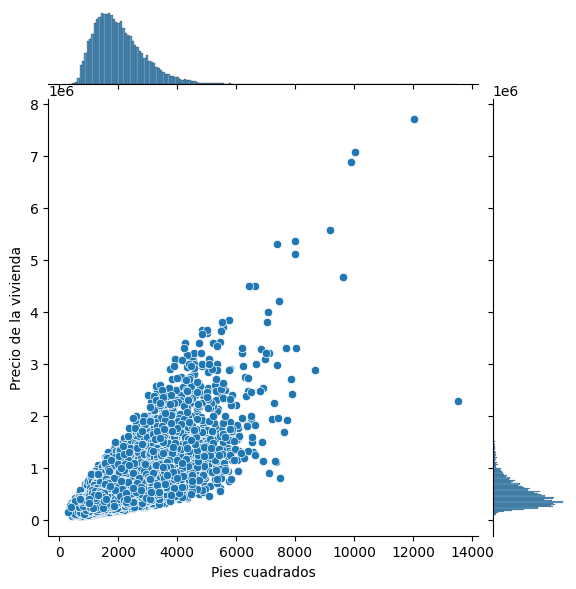

In [3]:
sns.jointplot(x='sqft_living', y='price', data=kchouse)
plt.xlabel('Pies cuadrados')
plt.ylabel('Precio de la vivienda')
plt.show()

Parece que evidentemente existe una relación, no completamente directa, pero existe.

### Divido en Train y Test:

In [4]:
x_train, x_test, y_train, y_test = train_test_split(kchouse['sqft_living'], kchouse['price'], test_size=0.3, random_state=10)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15127,), (6484,), (15127,), (6484,))

Además debo realizar un pequeño ajuste a los datos y es cambiar su shape, debido a que sklearn y pygam necesitan como input un array de numpy en vertical, como el que formo a continuación:

In [5]:
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
x_train

array([[ 940],
       [2560],
       [1260],
       ...,
       [1640],
       [1980],
       [1040]], dtype=int64)

### Modelado de la Regresión Lineal

Una vez tengo listo los datos, procedo a instanciar la clase LinearRegression de SKLearn y predigo con ella mi regresión

In [6]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
y_pred_lr

array([367978.43090064, 345516.04462087, 589794.4954134 , ...,
       831265.14792096, 435365.58973996, 351131.64119081])

Y procedo a graficar la linea de regresión obtenida:

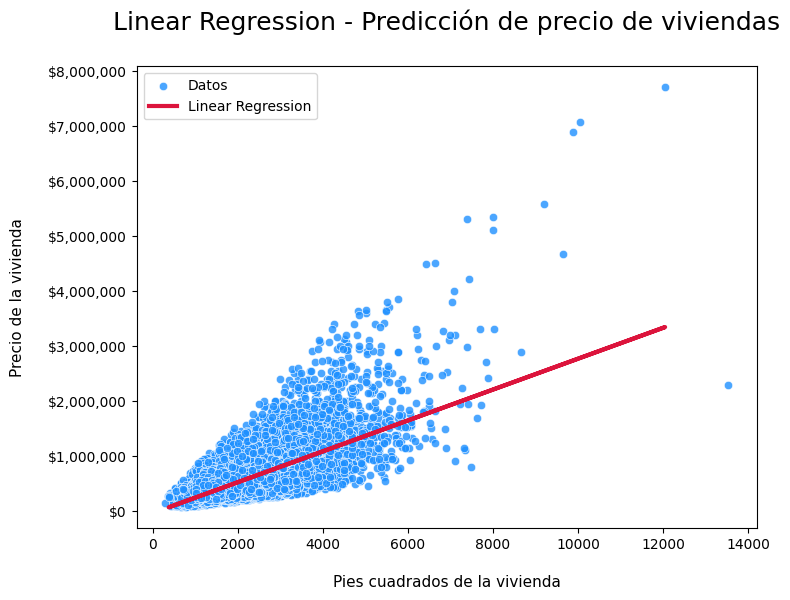

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x='sqft_living', y='price', data=kchouse, ax=ax, color='dodgerblue', alpha=0.8, label='Datos')
ax.plot(x_test, y_pred_lr, color='crimson', label='Linear Regression', linewidth=3)
ax.legend()
ax.legend(loc='upper left')
ax.set_title('Linear Regression - Predicción de precio de viviendas\n', fontdict={'fontsize': 18})
ax.set_xlabel('\nPies cuadrados de la vivienda', fontdict={'fontsize': 11})
ax.set_ylabel('Precio de la vivienda\n', fontdict={'fontsize': 11})
ax.yaxis.set_major_formatter('${x:,.0f}')
plt.show()

###### *Offtopic: me he alegrado al darme cuenta de que pude hacer esta regresión y gráfico en 1 minuto, cuando en mi primera vez tardé horas en entenderlo todo y hacer el mismo gráfico. Claro, no sabía ni lo que era instanciar un objeto y lo tuve que aprender solo en su momento...*

### Modelado del GAM:

Una vez lista la regresión, procedo a generar mi modelo de GAM instanciando el objeto LinearGAM de la librería PyGAM

In [8]:
gam = LinearGAM(s(0)).fit(x_train, y_train) # aplico una función spline a la variable independiente y entreno el modelo
y_pred_gam = gam.predict(x_test) # predigo los valores de la variable target (precio en este caso)
y_pred_gam

array([390463.22118269, 379714.72939053, 531416.34657646, ...,
       772167.85222277, 424264.11168519, 382403.32270844])

PyGAM me permite visualizar un resumen del modelo entrenado:

In [9]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     11.6399
Link Function:                     IdentityLink Log Likelihood:                               -389440.7619
Number of Samples:                        15127 AIC:                                           778906.8036
                                                AICc:                                          778906.8264
                                                GCV:                                      60577700044.1418
                                                Scale:                                    60493802082.2149
                                                Pseudo R-Squared:                                   0.5524
Feature Function                  Lam

Aquí podemos ver que la distribución aplicada es una normal y por ende la función de enlace es una función identidad, mientras que el Lambda es 0.6 y la cantidad de nodos es 20.

### Procedemos a graficar ambas funciones junto con los datos:

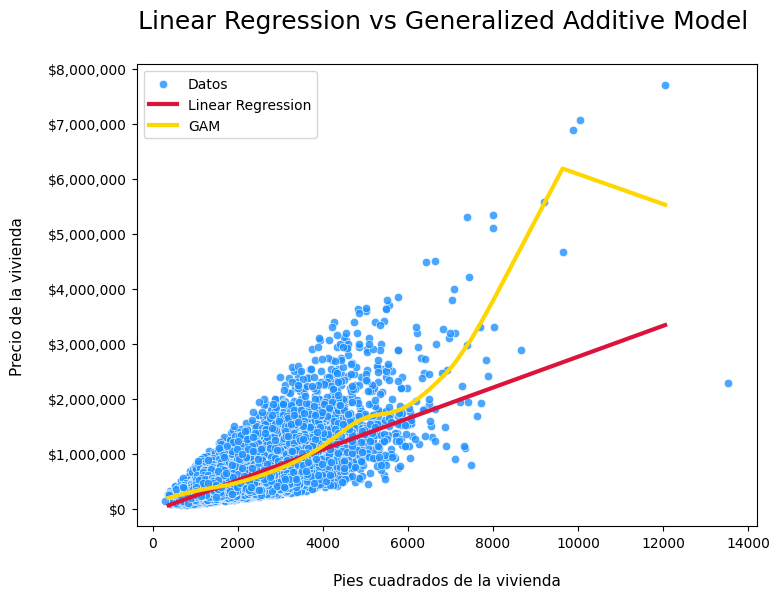

In [207]:
# Genero una función para no repetir tanto mi código a futuro:
def plot_gam(y_pred, extra_title=''):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.scatterplot(x='sqft_living', y='price', data=kchouse, ax=ax, color='dodgerblue', label='Datos', alpha=0.8)
    sns.lineplot(x=x_test.reshape(-1), y=y_pred_lr, color='crimson', label='Linear Regression', linewidth=3)
    sns.lineplot(x=x_test.reshape(-1), y=y_pred, color='gold', label='GAM', linewidth=3)
    ax.legend(loc='upper left')
    ax.set_title(f'Linear Regression vs Generalized Additive Model {extra_title}\n', fontdict={'fontsize': 18})
    ax.set_xlabel('\nPies cuadrados de la vivienda', fontdict={'fontsize': 11})
    ax.set_ylabel('Precio de la vivienda\n', fontdict={'fontsize': 11})
    ax.yaxis.set_major_formatter('${x:,.0f}')
    plt.show()

# Grafico:
plot_gam(y_pred_gam)

Vemos como claramente el GAM busca interpretar relaciones de una manera no lineal, dando mucha mayor flexibilidad a dicha función. Además observamos el comportamiento suavizado de la función en todos los puntos, excepto en el último cambio, seguramente debido a que solo hay un último punto muy diferente, que pareciese deberse a la inclusión de outliers en los datos.

### Medimos los modelos:

Vamos a medir los modelos con el mean squared error y también con el MAPE. Deberían dar resultados muy similares aunque esperamos pequeñas mejoras por parte del GAM.

In [10]:
mean_squared_error(y_test, y_pred_lr), mean_squared_error(y_test, y_pred_gam)

(67075290745.01161, 61019178232.90516)

In [11]:
mean_absolute_percentage_error(y_test, y_pred_lr), mean_absolute_percentage_error(y_test, y_pred_gam)

(0.3586402833603901, 0.345930722496438)

Se revela una mejora en los indicadores pero no tan alta. Es posible que en otro tipo de regresiones como podría ser una regresión multivariante las diferencias sean bastante más signficativas.

### Overfitting:

En este caso voy a instanciar el modelo GAM nuevamente pero utilizando el parámetro n_splines, el cual me permite forzar la cantidad de nodos o grados de libertad a utilizar en la función spline. Al elegir un número absurdamente alto podremos visualizar como la función comienza a sobreajustarse de manera gráfica.

In [12]:
gam_of = LinearGAM(s(0), n_splines=1000).fit(x_train, y_train)
y_pred_gam_of = gam_of.predict(x_test)
y_pred_gam_of

array([395812.12749174, 389927.80763677, 519694.46612513, ...,
       811139.52085508, 427533.20979825, 361323.03935828])

In [13]:
gam_of.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    291.8239
Link Function:                     IdentityLink Log Likelihood:                               -388359.7592
Number of Samples:                        15127 AIC:                                           777305.1662
                                                AICc:                                           777316.767
                                                GCV:                                      58344104218.6224
                                                Scale:                                    56321655814.9769
                                                Pseudo R-Squared:                                    0.591
Feature Function                  Lam

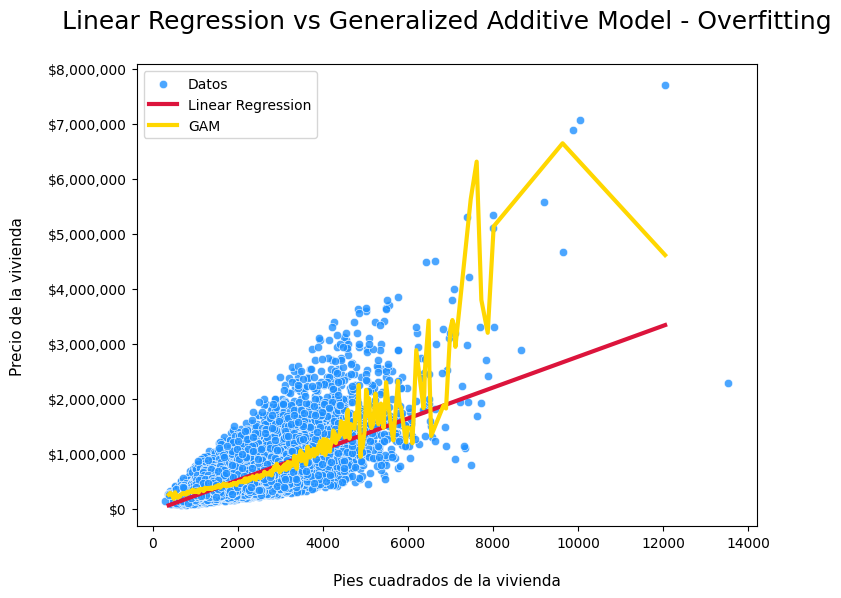

In [203]:
plot_gam(y_pred_gam_of, '- Overfitting')

Se puede notar de manera clarísima como la función se sobreajusta con muchísimos picos. Esto se podría ver reflejado en valores muy altos de la sumatoria de los cuadrados de la derivada segunda debido a la gran concavidad en los cambios de la función, como vimos con anterioridad.

### Underfitting:

Vamos a probar ahora con el caso contrario, forzando a una cantidad muy baja de nodos.

In [107]:
gam_uf = LinearGAM(s(0), n_splines=4).fit(x_train, y_train)
y_pred_gam_uf = gam_uf.predict(x_test)
y_pred_gam_uf

array([371671.51214956, 351789.54209316, 577049.26855733, ...,
       818653.3207362 , 432338.99128584, 356743.97836536])

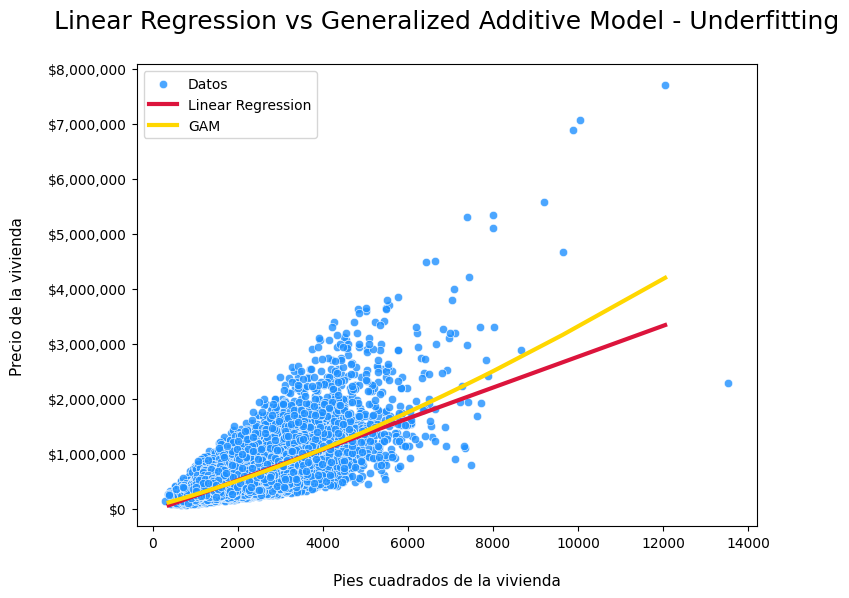

In [204]:
plot_gam(y_pred_gam_uf, '- Underfitting')

Ahora si podemos ver como en este caso se asemeja mucho más a la función de regresión lineal, debido a que no posee muchos grados de libertad para aplicar sus funciones se suavizado.

### Cambio de Lambda

En este caso voy a mostrar lo que pasa al modificar también el lambda de la función. En este caso, al probar con lambdas chicos como suele utilizarse, no había cambios gráficos significativos, por lo que procedo a utilizar un lambda más bien exagerado que me permita mostrar visualmente lo que pasa cuando se lo modifica, en este caso agrandándolo.

In [14]:
gam_l = LinearGAM(s(0), lam=200).fit(x_train, y_train)
y_pred_gam_l = gam_l.predict(x_test)
y_pred_gam_l

array([386988.59453203, 374658.76228026, 534198.04909944, ...,
       779089.93811299, 426078.00285113, 377715.1865819 ])

In [15]:
gam_l.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                       5.173
Link Function:                     IdentityLink Log Likelihood:                               -389938.8335
Number of Samples:                        15127 AIC:                                            779890.013
                                                AICc:                                          779890.0188
                                                GCV:                                      62557280976.7439
                                                Scale:                                    62518774925.1219
                                                Pseudo R-Squared:                                   0.5372
Feature Function                  Lam

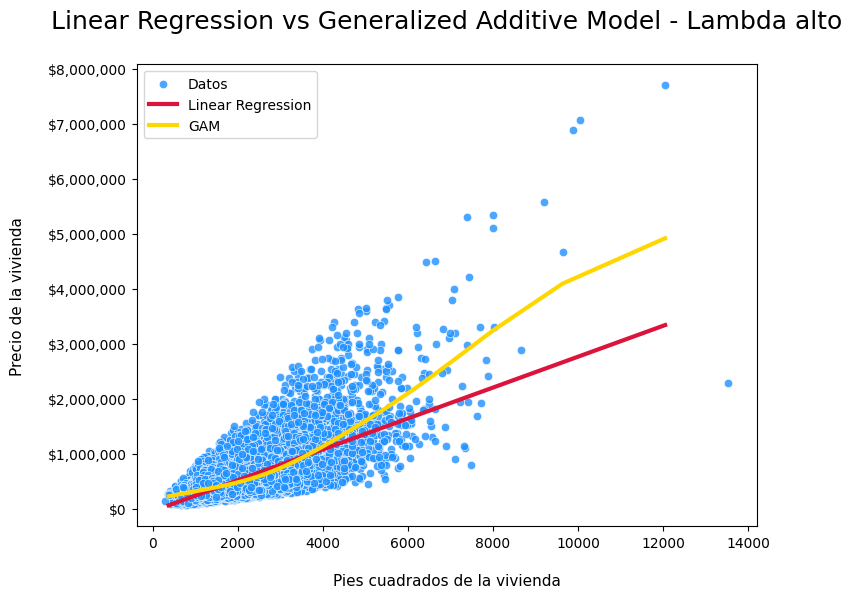

In [205]:
plot_gam(y_pred_gam_l, '- Lambda alto')

Como podemos observar, la función parece suavizarse aún más que en su versión base. Eso implica que se penaliza aún más que la función no sea lo suficientemente suave.

### GridSearch

Finalmente, muestro como se pueden determinar opciones en cuanto a parámetros como el lambda o el número de nodos, y que la función determine el óptimo.

In [16]:
n_splines=np.arange(5,26,2)
lams=np.arange(1,302,50)

gam_grid = LinearGAM(s(0)).gridsearch(x_train, y_train, lam=lams, n_splines=n_splines)

100% (77 of 77) |########################| Elapsed Time: 0:00:11 Time:  0:00:11


In [17]:
gam_grid.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     13.4721
Link Function:                     IdentityLink Log Likelihood:                               -389436.7638
Number of Samples:                        15127 AIC:                                           778902.4719
                                                AICc:                                          778902.5016
                                                GCV:                                      60574919693.5332
                                                Scale:                                    60477820726.5841
                                                Pseudo R-Squared:                                   0.5526
Feature Function                  Lam

El lambda elegido es 1 y el número de nodos es 25

In [151]:
y_pred_gam_grid = gam_grid.predict(x_test)

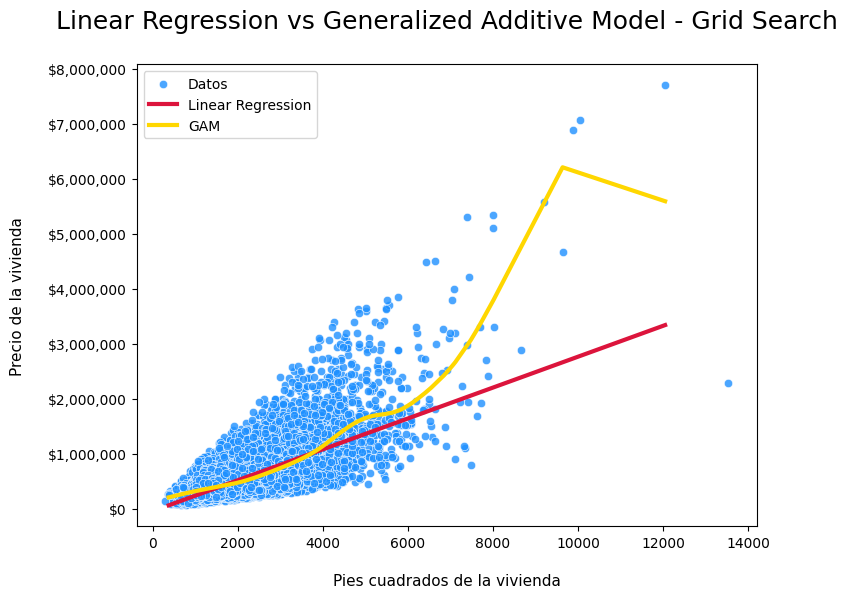

In [206]:
plot_gam(y_pred_gam_grid, '- Grid Search')

En este caso la función se parece mucho a la original, por lo que la versión automática parece estar bastante bien, al menos para casos simples.

Esto sería todo en cuanto a lo que es el análisis práctico simple. En el siguiente notebook se podrá corroborar la aplicación del modelo en un dataset mucho mayor y además en un caso de clasificación.